In [1]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LinearSegmentedColormap

In [2]:
df = pd.read_csv('./data/experiment_stats/track_memorability_details_beta.csv')

In [3]:
df.columns = ['track','interval']
df

,track,interval
0,normalize_5s_intro_thc1MtNagC8.wav,"[{32: 1}, {13: 0}, {28: 0}, {48: 0}, {17: 1}, ..."
1,normalize_5s_intro_Wo2qUD1g7xM.wav,"[{44: 1}, {16: 1}, {35: 0}, {104: 1}, {32: 1},..."
2,normalize_5s_intro_3ObVN3QQiZ8.wav,"[{44: 0}, {74: 1}, {272: 1}, {25: 0}, {10: 1},..."
3,normalize_5s_intro_S-zQJFRX5Fg.wav,"[{216: 1}, {107: 1}, {23: 1}, {27: 1}, {12: 1}..."
4,normalize_5s_intro_SyZOAgXiPMw.wav,"[{43: 1}, {21: 0}, {116: 0}, {254: 1}, {37: 1}..."
...,...,...
230,normalize_5s_intro_D4nWzd63jV4.wav,"[{88: 1}, {38: 0}, {22: 1}, {16: 0}, {107: 0},..."
231,normalize_5s_intro_9odM1BRqop4.wav,"[{28: 0}, {32: 0}, {30: 0}, {20: 0}, {83: 0}, ..."
232,normalize_5s_intro_F64yFFnZfkI.wav,"[{12: 1}, {83: 1}, {72: 0}, {13: 1}, {84: 1}, ..."
233,normalize_5s_intro_Js2JQH_kt0I.wav,"[{37: 1}, {220: 0}, {32: 0}, {216: 1}, {14: 1}..."


In [4]:
df.loc[0]

track                      normalize_5s_intro_thc1MtNagC8.wav
interval    [{32: 1}, {13: 0}, {28: 0}, {48: 0}, {17: 1}, ...
Name: 0, dtype: object

In [5]:
score_list = []
for data in df['interval']:
    data = data[:-1].split(",")
    intv_score = []
    for pair in data:
        pair = pair[2:-1]
        pair = pair.split(":")
        intv_score.append((int(pair[0]),int(pair[1])))
        
    normal = np.array([intv for intv in intv_score if intv[0] >= 10 and intv[0] <= 49])
    cross_1 = np.array([intv for intv in intv_score if intv[0] >= 61 and intv[0] <= 131])
    cross_2 = np.array([intv for intv in intv_score if intv[0] >= 155 and intv[0] <= 276])
    intv_score = np.array(intv_score) 
    normal_score = np.mean(normal, axis=0)[1]
    cross_1_score = np.mean(cross_1, axis=0)[1]
    if cross_2.size != 0:
        cross_2_score = np.mean(cross_2, axis=0)[1]
    else:
        cross_2_score = -1
    total_score = np.mean(intv_score, axis=0)[1]
    
    score_list.append((normal_score,cross_1_score,cross_2_score))

In [6]:
score_list = [score for score in score_list if score[2] != -1]
score_list = np.array(sorted(score_list, key = lambda s: s[0]))

In [7]:
print(score_list)

[[0.13333333 0.05263158 0.36363636]
 [0.29787234 0.15384615 0.        ]
 [0.3125     0.36363636 0.22222222]
 [0.32       0.13888889 0.09090909]
 [0.32075472 0.04545455 0.125     ]
 [0.3559322  0.08695652 0.18181818]
 [0.35714286 0.45833333 0.36363636]
 [0.36       0.37037037 0.11111111]
 [0.36363636 0.39130435 0.55555556]
 [0.36956522 0.5        0.35      ]
 [0.38636364 0.375      0.38461538]
 [0.39583333 0.29411765 0.41666667]
 [0.40425532 0.36       0.25      ]
 [0.40677966 0.53846154 0.6       ]
 [0.41176471 0.33333333 0.35714286]
 [0.41509434 0.31818182 0.3       ]
 [0.41509434 0.35714286 0.46153846]
 [0.41666667 0.5        0.4       ]
 [0.43478261 0.44444444 0.5       ]
 [0.45238095 0.33333333 0.27272727]
 [0.45454545 0.35294118 0.16666667]
 [0.45454545 0.29032258 0.2       ]
 [0.45833333 0.5        0.5       ]
 [0.46511628 0.33333333 0.22222222]
 [0.46666667 0.4        0.33333333]
 [0.46666667 0.18181818 0.30769231]
 [0.46938776 0.13043478 0.09090909]
 [0.46938776 0.15789474 0.25

/home/lab812/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


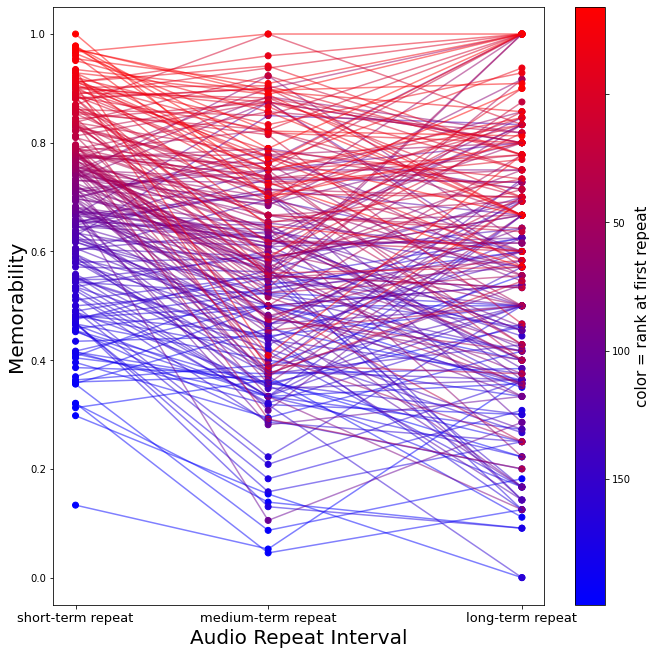

In [10]:
#sample rate
sample_rate = 1  
sample = np.arange(0,len(score_list),sample_rate)

#plot size
plt.figure(figsize=(11, 11))

# X axis(delay interval) 
x = np.array([25,110,222]*len(score_list)) #based on average of three stage
x.resize((len(score_list),3))

#colormap gradient
color = np.repeat(np.arange(1,len(score_list)+1),3)
color.resize((len(score_list),3))

#color
colors = ["blue","red"] 
cmap1 = LinearSegmentedColormap.from_list("mycmap", colors)

#plot dots
plt.scatter(x=[x[i] for i in sample],y=[score_list[i] for i in sample],c=[color[i] for i in sample],cmap=cmap1)

#plot lines
for i in range(0,len(score_list),sample_rate):
    plt.plot([25,110,222],score_list[i],"-",c=[(i/(len(score_list)-1)),0,((1-i/(len(score_list)-1))),0.5])
    
#plot colorbar
c_bar = plt.colorbar(orientation="vertical")
c_bar.ax.set_yticklabels(['200','150','100','50'])
c_bar.set_label('color = rank at first repeat',size = 15)

#labels
plt.xticks([25,110,222],['short-term repeat','medium-term repeat','long-term repeat'], fontsize=13)
plt.ylabel("Memorability",size=20) 
plt.xlabel("Audio Repeat Interval",size=20)
plt.savefig("correlation.png")
plt.show()


In [9]:
score_t = np.transpose(score_list)
cor_0_1, pval = stats.spearmanr(score_t[0], score_t[1])
cor_1_2, pval = stats.spearmanr(score_t[1], score_t[2])
cor_0_2, pval = stats.spearmanr(score_t[0], score_t[2])
print(cor_0_1,cor_1_2,cor_0_2)

0.7038214865731751 0.6501634345663544 0.6673457363348859
